<a href="https://colab.research.google.com/github/itohanosa/ito/blob/master/Copy_of_Variable_importance_4Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialize Google Earth Engine
!pip install earthengine-api
!earthengine authenticate

import ee
try:
  ee.Initialize()
  print('The Earth Engine package initialized successfully!')
except ee.EEException as e:
  print('The Earth Engine package failed to initialize!')
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

Running command using Cloud API.  Set --no-use_cloud_api to go back to using the API

/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=dlpp6pfSTjV33MGi9CrhJXRWdkuT9N7jwh3U2-1Wc0s&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in 

In [ ]:
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from shapely.geometry import shape
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import r2_score
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

# Function to Convert Feature Classes to Pandas Dataframe
def fc2df(fc):
    features = fc.getInfo()['features']
    dictarr = []
    for f in features:
        attr = f['properties']
        dictarr.append(attr)

    return pd.DataFrame(dictarr)

In [ ]:
# load training dataset
assetID = 'users/abuitohanosa/stratified4'
tableGEE = ee.FeatureCollection(assetID);
tableGEElist = tableGEE.toList(100000)

tableGEE1 = ee.FeatureCollection(tableGEElist.slice(0, 5000))
df =  fc2df(tableGEE1)

In [ ]:
# change non-valid number to nan
df = df.replace([-11], np.nan).dropna()
print('Number of samples: ' + str(len(df)))

Number of samples: 4822


In [ ]:
#Distribution of Classes
print()
print('Class1: ' + str(sum(df.classification==1)) + ' points - ' + str(round(sum(df.classification==1)/len(df.classification)*100,2)) + '%')
#print('Class2: ' + str(sum(df.classification==2)) + ' points - ' + str(round(sum(df.classification==2)/len(df.classification)*100,2)) + '%')
print('Class3: ' + str(sum(df.classification==3)) + ' points - ' + str(round(sum(df.classification==3)/len(df.classification)*100,2)) + '%')
print('Class4: ' + str(sum(df.classification==4)) + ' points - ' + str(round(sum(df.classification==4)/len(df.classification)*100,2)) + '%')
print('Class6: ' + str(sum(df.classification==6)) + ' points - ' + str(round(sum(df.classification==6)/len(df.classification)*100,2)) + '%')
print('Class10: ' + str(sum(df.classification==10)) + ' points - ' + str(round(sum(df.classification==10)/len(df.classification)*100,2)) + '%')
print('Class11: ' + str(sum(df.classification==11)) + ' points - ' + str(round(sum(df.classification==11)/len(df.classification)*100,2)) + '%')


Class1: 80 points - 1.66%
Class3: 0 points - 0.0%
Class4: 1000 points - 20.74%
Class6: 921 points - 19.1%
Class10: 821 points - 17.03%
Class11: 0 points - 0.0%


In [ ]:
# Create variable with predictive data and display all feature names
Xall = df.copy()
Xall = Xall.drop(['longitude','latitude', 'classification'],axis='columns')
allBands = Xall.columns.tolist()
print(Xall.columns.values)

classificaton_f = df.classification

['B4' 'B4_1' 'B4_asm' 'B4_contrast' 'B4_corr' 'B4_dent' 'B4_diss'
 'B4_dvar' 'B4_ent' 'B4_idm' 'B4_imcorr1' 'B4_imcorr2' 'B4_inertia'
 'B4_maxcorr' 'B4_prom' 'B4_savg' 'B4_sent' 'B4_shade' 'B4_svar' 'B4_var'
 'B8' 'B8_1' 'B8_asm' 'B8_contrast' 'B8_corr' 'B8_dent' 'B8_diss'
 'B8_dvar' 'B8_ent' 'B8_idm' 'B8_imcorr1' 'B8_imcorr2' 'B8_inertia'
 'B8_maxcorr' 'B8_prom' 'B8_savg' 'B8_sent' 'B8_shade' 'B8_svar' 'B8_var'
 'IR_asm' 'IR_contrast' 'IR_corr' 'IR_dent' 'IR_diss' 'IR_dvar' 'IR_ent'
 'IR_idm' 'IR_imcorr1' 'IR_imcorr2' 'IR_inertia' 'IR_maxcorr' 'IR_prom'
 'IR_savg' 'IR_sent' 'IR_shade' 'IR_svar' 'IR_var' 'VH_asm' 'VH_contrast'
 'VH_corr' 'VH_dent' 'VH_diss' 'VH_dvar' 'VH_ent' 'VH_idm' 'VH_imcorr1'
 'VH_imcorr2' 'VH_inertia' 'VH_maxcorr' 'VH_prom' 'VH_savg' 'VH_sent'
 'VH_shade' 'VH_smoothed' 'VH_svar' 'VH_var' 'VV_asm' 'VV_contrast'
 'VV_corr' 'VV_dent' 'VV_diss' 'VV_dvar' 'VV_ent' 'VV_idm' 'VV_imcorr1'
 'VV_imcorr2' 'VV_inertia' 'VV_maxcorr' 'VV_prom' 'VV_savg' 'VV_sent'
 'VV_shade' '

In [ ]:
# Complete name of the features
bands_completeName = ['B4' 'B8' 'B8_asm' 'B8_contrast' 'B8_corr' 'B8_dent' 'B8_diss' 'B8_dvar'
 'B8_ent' 'B8_idm' 'B8_imcorr1' 'B8_imcorr2' 'B8_inertia' 'B8_maxcorr'
 'B8_prom' 'B8_savg' 'B8_sent' 'B8_shade' 'B8_svar' 'B8_var' 'Brightness'
 'Greenness' 'VH_sm2' 'VH_sm2_asm' 'VH_sm2_contrast' 'VH_sm2_corr'
 'VH_sm2_dent' 'VH_sm2_diss' 'VH_sm2_dvar' 'VH_sm2_ent' 'VH_sm2_idm'
 'VH_sm2_imcorr1' 'VH_sm2_imcorr2' 'VH_sm2_inertia' 'VH_sm2_maxcorr'
 'VH_sm2_prom' 'VH_sm2_savg' 'VH_sm2_sent' 'VH_sm2_shade' 'VH_sm2_svar'
 'VH_sm2_var' 'VV_sm2' 'VV_sm2_asm' 'VV_sm2_contrast' 'VV_sm2_corr'
 'VV_sm2_dent' 'VV_sm2_diss' 'VV_sm2_dvar' 'VV_sm2_ent' 'VV_sm2_idm'
 'VV_sm2_imcorr1' 'VV_sm2_imcorr2' 'VV_sm2_inertia' 'VV_sm2_maxcorr'
 'VV_sm2_prom' 'VV_sm2_savg' 'VV_sm2_sent' 'VV_sm2_shade' 'VV_sm2_svar'
 'VV_sm2_var' 'Wetness']
features_label = np.array(bands_completeName)

In [ ]:
# CROSS VALIDATION 1TRAIN 9TEST VS. 9TRAIN 1TEST

# set variables 0 - all bands
bands = allBands

# set variables 1 - original bands of Sentinel-1 and Sentinel-2
#bands = bandsNoFeatures

# set variables 2 - bands from permutation analysis
bands = ['B4' 'B8' 'B8_asm' 'B8_contrast' 'B8_corr' 'B8_dent' 'B8_diss' 'B8_dvar'
 'B8_ent' 'B8_idm' 'B8_imcorr1' 'B8_imcorr2' 'B8_inertia' 'B8_maxcorr'
 'B8_prom' 'B8_savg' 'B8_sent' 'B8_shade' 'B8_svar' 'B8_var' 'Brightness'
 'Greenness' 'VH_sm2' 'VH_sm2_asm' 'VH_sm2_contrast' 'VH_sm2_corr'
 'VH_sm2_dent' 'VH_sm2_diss' 'VH_sm2_dvar' 'VH_sm2_ent' 'VH_sm2_idm'
 'VH_sm2_imcorr1' 'VH_sm2_imcorr2' 'VH_sm2_inertia' 'VH_sm2_maxcorr'
 'VH_sm2_prom' 'VH_sm2_savg' 'VH_sm2_sent' 'VH_sm2_shade' 'VH_sm2_svar'
 'VH_sm2_var' 'VV_sm2' 'VV_sm2_asm' 'VV_sm2_contrast' 'VV_sm2_corr'
 'VV_sm2_dent' 'VV_sm2_diss' 'VV_sm2_dvar' 'VV_sm2_ent' 'VV_sm2_idm'
 'VV_sm2_imcorr1' 'VV_sm2_imcorr2' 'VV_sm2_inertia' 'VV_sm2_maxcorr'
 'VV_sm2_prom' 'VV_sm2_savg' 'VV_sm2_sent' 'VV_sm2_shade' 'VV_sm2_svar'
 'VV_sm2_var' 'Wetness']

In [ ]:
#GINI index
bands = allBands

# prepare data
X = Xall[bands].copy()
y = df.classification.copy()

X_train = X.copy()
y_train = y.copy()
X_test = X.copy()
y_test = y.copy()

# fit a RF with all bands
modelGINI = RandomForestClassifier(n_estimators=1000, random_state=500,min_samples_split=5,min_samples_leaf=5,max_features='sqrt',oob_score=0,
                              warm_start=True)
modelGINI = modelGINI.fit(X_train, y_train)

In [ ]:
# take the most relevant features
features = X.columns.values
importances = modelGINI.feature_importances_
indices = np.argsort(importances)

print(features[indices][-133:])

['B8_svar' 'B8_contrast' 'B8_corr' 'B8_diss' 'B8_dvar' 'B8_ent' 'B8_idm'
 'B8_imcorr1' 'B8_asm' 'B8_imcorr2' 'B8_maxcorr' 'B8_prom' 'B8_savg'
 'B8_sent' 'B8_shade' 'B8_var' 'VH_maxcorr' 'B8_inertia' 'VV_maxcorr'
 'B8_dent' 'B4_dent' 'B4_asm' 'B4_contrast' 'B4_corr' 'B4_var' 'B4_diss'
 'B4_dvar' 'B4_ent' 'B4_idm' 'B4_imcorr1' 'IR_maxcorr' 'B4_inertia'
 'B4_maxcorr' 'B4_prom' 'B4_savg' 'B4_sent' 'B4_shade' 'B4_svar'
 'B4_imcorr2' 'VV_corr' 'VV_imcorr1' 'VH_corr' 'VV_imcorr2' 'VH_imcorr1'
 'IR_corr' 'VV_prom' 'IR_imcorr1' 'VV_shade' 'VV_asm' 'VV_dvar'
 'VH_imcorr2' 'IR_shade' 'VV_var' 'VH_idm' 'VH_asm' 'VV_contrast'
 'VH_prom' 'VV_svar' 'VH_ent' 'IR_prom' 'VH_svar' 'VV_inertia' 'VV_idm'
 'IR_svar' 'VH_inertia' 'IR_var' 'VH_var' 'IR_asm' 'VH_dvar' 'IR_imcorr2'
 'VH_contrast' 'IR_ent' 'IR_contrast' 'IR_dvar' 'VV_ent' 'IR_inertia'
 'VH_shade' 'IR_idm' 'IR_sent' 'VH_diss' 'VH_sent' 'VV_sent' 'VH_dent'
 'VV_savg' 'VV_diss' 'IR_diss' 'IR_dent' 'VV_dent' 'B4' 'B4_1' 'VH_savg'
 'VV_smoothed' 'VH_

([<matplotlib.axis.YTick at 0x7f4e983a1320>,
 [Text(0, 0, 'IR_maxcorr'),
  Text(0, 0, 'IR_prom'),
  Text(0, 0, 'IR_savg'),
  Text(0, 0, 'IR_sent'),
  Text(0, 0, 'IR_shade'),
  Text(0, 0, 'IR_svar'),
  Text(0, 0, 'IR_var'),
  Text(0, 0, 'VH_asm'),
  Text(0, 0, 'VH_contrast'),
  Text(0, 0, 'VH_corr'),
  Text(0, 0, 'VH_dent'),
  Text(0, 0, 'VH_diss'),
  Text(0, 0, 'VH_dvar'),
  Text(0, 0, 'VH_ent'),
  Text(0, 0, 'VH_idm'),
  Text(0, 0, 'VH_imcorr1'),
  Text(0, 0, 'VH_imcorr2'),
  Text(0, 0, 'VH_inertia'),
  Text(0, 0, 'VH_maxcorr'),
  Text(0, 0, 'VH_prom'),
  Text(0, 0, 'VH_savg'),
  Text(0, 0, 'VH_sent'),
  Text(0, 0, 'VH_shade'),
  Text(0, 0, 'VH_smoothed'),
  Text(0, 0, 'VH_svar'),
  Text(0, 0, 'VH_var'),
  Text(0, 0, 'VV_asm'),
  Text(0, 0, 'VV_contrast'),
  Text(0, 0, 'VV_corr'),
  Text(0, 0, 'VV_dent'),
  Text(0, 0, 'VV_diss'),
  Text(0, 0, 'VV_dvar'),
  Text(0, 0, 'VV_ent'),
  Text(0, 0, 'VV_idm'),
  Text(0, 0, 'VV_imcorr1'),
  Text(0, 0, 'VV_imcorr2'),
  Text(0, 0, 'VV_inertia'),


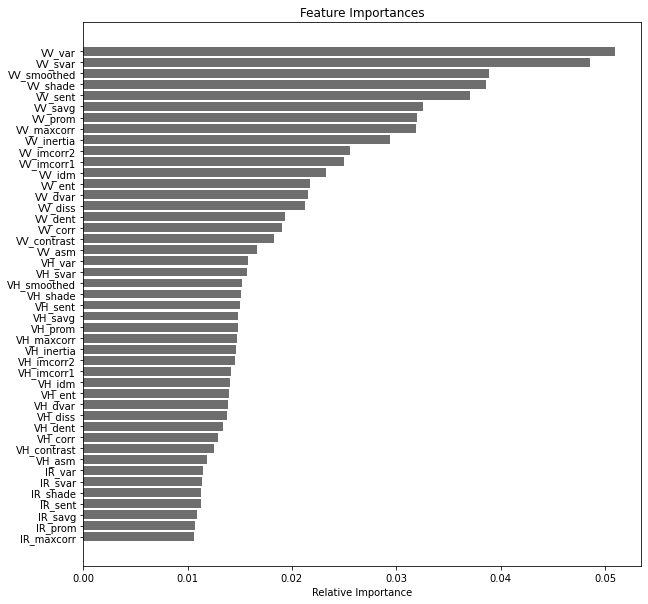

In [ ]:
# plot figure
plt.rcParams['figure.figsize'] = [10, 10]
plt.title('Feature Importances')
plt.barh(range(len(indices[-45:])), importances[indices][-45:], color='#6E6E6E', align='center')
plt.xlabel('Relative Importance')
#plt.yticks(range(len(indices)), features)
plt.yticks(range(len(indices[-45:])), features[-45:])